### a) Theorical mean and variance calculation

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import random
import math
import os

In [2]:
#Calculation of theorical means and variances for each dataset

#Q ~ N(3,3)
meanQ = 3
varQ = 3

#X ~ U[0,6]
a = 0; b = 6
meanX = (a+b)/2
varX = ((b-a)**2)/12

#Y ~ E(1/3)
gamma = 1/3
meanY = 1.0/gamma
varY = 1.0/(gamma**2)

#T ~ B(10, 0.30)
N = 10; p = 0.30
meanT = N*p
varT = N*p*(1-p)  # Calculation is not exact

#Lets put all theorical mean and variance into a dictionary. This will make easy to show theorical and calculated values

thry_stas = {'data1q': [meanQ,varQ],
             'data1x': [meanX,varX],
             'data1y': [meanY,varY],
             'data1t': [meanT,varT]}

thry_stats = pd.DataFrame.from_dict(thry_stas, orient='index', 
                                   columns=['Theorical Mean','Theorical Variance'])

thry_stats


,Theorical Mean,Theorical Variance
data1q,3.0,3.0
data1x,3.0,3.0
data1y,3.0,9.0
data1t,3.0,2.1


this is my variabel {{varQ}}

### b) Read data, and calculate their mean and variance

In [3]:
#Read datasets

datadir = 'dados/'
datasets = []

# Loop to read all files and cancatenate them into a single dataframe
for file in os.listdir(datadir):
    file_path = datadir + file
    f_name = file.split('.')[0]   # To specify filenames as column names
    
    df = pd.read_csv(file_path,header = None, names = [f_name])
    datasets.append(df)

datasets = pd.concat(datasets, axis = 1)

In [4]:
# Calculate mean and variance from data

aprox_mean = datasets.mean()        # sample mean
aprox_var = datasets.var(ddof = 1)  # when ddof = 1, we get sample variance

aprox_stats = pd.DataFrame({'Aprox Mean': aprox_mean,
                          'Aprox Variance': aprox_var})

#Join theorical and calculated stats

dataset_stats = pd.concat([thry_stats, aprox_stats], axis = 1)
dataset_stats['Mean diff'] = dataset_stats['Theorical Mean'] - dataset_stats['Aprox Mean'] 

dataset_stats['Var diff'] = dataset_stats['Theorical Variance'] - dataset_stats['Aprox Variance']

dataset_stats


,Theorical Mean,Theorical Variance,Aprox Mean,Aprox Variance,Mean diff,Var diff
data1q,3.0,3.0,3.001631,2.999812,-0.001631,0.000188
data1x,3.0,3.0,3.000080,3.006318,-0.000080,-0.006318
data1y,3.0,9.0,3.002258,9.044840,-0.002258,-0.044840
data1t,3.0,2.1,3.003012,2.105371,-0.003012,-0.005371


### c) Show data histogramas

In [5]:
def plot_hist_on_axes(axe, data, mu, var, ht = 'density', bin_number = 50, show_stats = True):
    '''
    This function recieve a specific axis and dataset to plot on it:
    histogram of relative frequency, lines to represent mean and variance
    Also allow to modify the number of bins if it is need.
    
    mu: numeric value representing mean that will be plot in a vertical line
    var: numeric value representing variancia, it will be plot as mu +/-var  
    ht: histogram type, allow to define the stat parameter of seaborn
    bin_number: it is use to modify the number of bins (or bars) that will be show
    show_stats: boolean value, allow to decide to weather or not plot mean and variance
    '''
    sns.histplot(ax = axe, data = data, bins = bin_number, stat=ht, alpha = 0.4)
    if show_stats:
        axe.axvline(x=mu, color = 'magenta')
        axe.axvline(x=mu + var, color = 'magenta',linestyle='--')
        axe.axvline(x=mu - var, color = 'magenta',linestyle='--')

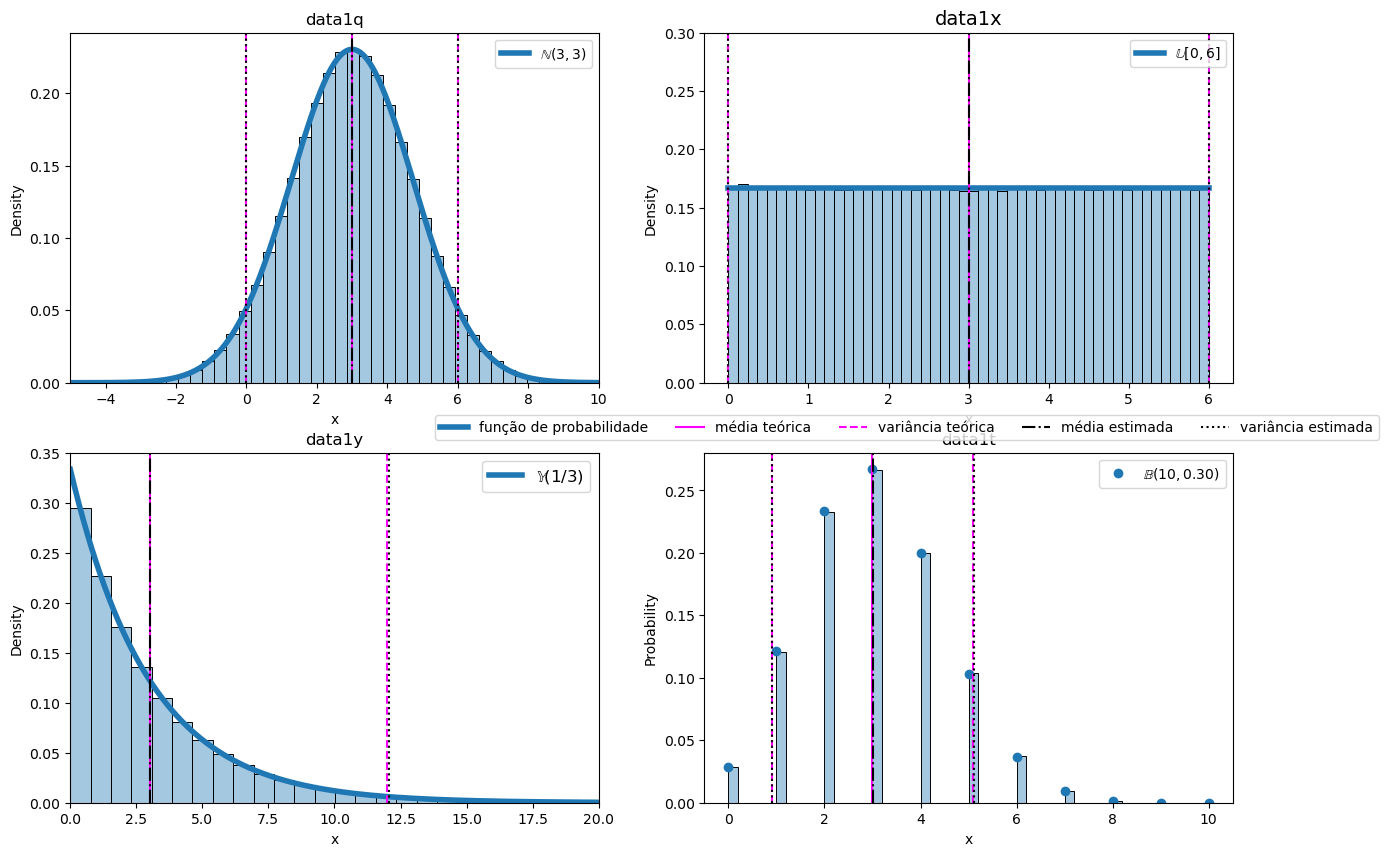

In [6]:
fig, axes = plt.subplots(2,2, figsize = (15,10))

# Plot PDFs

# Plot normal distribution 
x_axis = np.arange(-5,10,0.01)

q_pdf = stats.norm.pdf(x_axis,meanQ,math.sqrt(varQ)) 

axes[0,0].plot(x_axis, q_pdf, linewidth = 4, label = r'$\mathbb{N} (3,3)$')
axes[0,0].legend()

#Plot uniform distribution
pU = 1 / (b-a)
axes[0,1].plot([a,b],[pU,pU], linewidth = 4,label = r'$\mathbb{U} [0,6]$')
axes[0,1].legend()

# Plot exponential distribution
x_axis = np.arange(0,20,0.01)
pdf = gamma*np.exp(-gamma*x_axis)
axes[1,0].plot(x_axis, pdf, linewidth = 4,label = r'$\mathbb{Y} (1/3)$')
axes[1,0].legend(fontsize = "12")

# Plot binomial mass function
x_axis = np.arange(0,11,1)
pmfT = stats.binom.pmf(x_axis,10,0.3)
axes[1,1].plot(x_axis,pmfT, 'o', linewidth = 4,label = r'$\mathbb{B} (10,0.30)$')
axes[1,1].legend()

axes[0,0].lines[0].set_label('')

#############################################

# Plot histogram data Q

#Plot theorical mean and variance, just on this for show figure legend
mu  = thry_stats['Theorical Mean']['data1q']
var = thry_stats['Theorical Variance']['data1q']
axes[0,0].axvline(mu, color = 'magenta', label = 'média teórica')
axes[0,0].axvline(mu  + var, color = 'magenta', linestyle = '--', label = 'variância teórica')

# Plot aproximated mean and variance as vertical lines
axes[0,0].axvline(aprox_mean['data1q'], color = 'black',linestyle = '-.', label = 'média estimada')
axes[0,0].axvline(aprox_mean['data1q'] + aprox_var['data1q'], color = 'black', linestyle = ':', label = 'variância estimada')

# Plot histograms with show_stats = False, we alredy plot mean and variance
plot_hist_on_axes(axes[0,0],datasets['data1q'],0,0,show_stats=False)

#plot -variance separete witout labels, for custom legend
axes[0,0].axvline(mu  - var, color = 'magenta', linestyle = '--')
axes[0,0].axvline(aprox_mean['data1q'] - aprox_var['data1q'], color = 'black', linestyle = ':')

#Show figure legend. All axes have same elements, so we show a commond legend
fig.legend(['função de probabilidade','média teórica','variância teórica', 'média estimada','variância estimada'],
          loc='right',ncol = 5)

# Custom labels
axes[0,0].set_xlabel('x')
axes[0,0].set_xlim(-5,10)
axes[0,0].set_title('data1q')

# X dataset
#Plot histograms and theorical mean and variance
plot_hist_on_axes(axes[0,1],datasets['data1x'], 
                  meanX, 
                  varX)
# Plot aproximated mean and variance
axes[0,1].axvline(aprox_mean['data1x'], color = 'black', linestyle = '-.', label = 'Aprox mean')
axes[0,1].axvline(aprox_mean['data1x'] + aprox_var['data1x'], color = 'black', linestyle = ':', label = 'Aprox var')
axes[0,1].axvline(aprox_mean['data1x'] - aprox_var['data1x'], color = 'black', linestyle = ':')

# Custom labels 
axes[0,1].set_xlabel('x')
axes[0,1].set_ylim(0,0.30)
axes[0,1].set_title('data1x', fontsize = "14")

#Y dataset
#Plot histogram and theorical mean and variance
plot_hist_on_axes(axes[1,0],datasets['data1y'], 
                  meanY, 
                  varY)
# Plot aproximated mean and variance
axes[1,0].axvline(aprox_mean['data1y'], color = 'black', linestyle = '-.', label = 'Aprox mean')
axes[1,0].axvline(aprox_mean['data1y'] + aprox_var['data1y'], color = 'black', linestyle = ':', label = 'Aprox var')

#Custom labels
axes[1,0].set_xlim(0,20)
axes[1,0].set_xlabel('x')
axes[1,0].set_title('data1y')

# T dataset
#Plot histogram and theorical mean and variance
plot_hist_on_axes(axes[1,1],datasets['data1t'], 
                  meanT, 
                  varT,  ht = 'probability')
# Plot aproximated mean and variance
axes[1,1].axvline(aprox_mean['data1t'], color = 'black', linestyle = '-.', label = 'Aprox mean')
axes[1,1].axvline(aprox_mean['data1t'] + aprox_var['data1t'], color = 'black', linestyle = ':', label = 'Aprox var')
axes[1,1].axvline(aprox_mean['data1t'] - aprox_var['data1t'], color = 'black', linestyle = ':')
#Custom labels
axes[1,1].set_xlabel('x')
axes[1,1].set_title('data1t')

# plt.savefig('plots/histograms_datasets.png',dpi = 600)
plt.show()

### d) sample mean and sample variance build and plot function

In [7]:
def construc_rand_var(dataset,n,m):
    '''
    This function first create the sample mean and variance random variables for an specific n value.
    This process is repeated m times into a for loop. All calculated menas and variances are stored
    in a dictionary that is returned at the end of the function.
    '''
    xbar_values = {'means':[],
                   'vars':[]}

    # loop to repeat the process m times and get m means and variances
    for i in range(m):
        
        # Get the n values of the dataset
        sub_sample = random.choices(dataset,k=n)  #choices performance is better than .sample
        sub_sample = np.array(sub_sample)
        
        #Calculate mean and variance through numpy 
        sub_mean = sub_sample.mean()
        sub_var = sub_sample.var(ddof = 1)
        
        #Storage values in a dictionary
        xbar_values['means'].append(sub_mean)  
        xbar_values['vars'].append(sub_var)
    return xbar_values

def construct_n_rand_var(dataset, n_list, m):
    '''
    This function permute construc_rand_var on a list of different n values 
    for a specific dataset. 
    
    Return a two dataframes for mean and varaince sample points 
    '''
    means_n = {}
    vars_n = {}

    # loop to itarete over all elements of the n_list
    for n in n_list:
        # Getting m random points for a especific n
        rnd_vrbl = construc_rand_var(dataset,n,m)  
        
        # Save mean and varincia in a dictionary 
        col_name = 'n=' + str(n)    # Set the name column as n=5,10,50
        means_n[col_name] = rnd_vrbl['means']
        vars_n[col_name] = rnd_vrbl['vars']

    # Convert dictionaries into dataframes
    df_means = pd.DataFrame(means_n)
    df_vars = pd.DataFrame(vars_n)
    
    return df_means, df_vars

def get_norm_by_n(n_list, mu, var, x_axis):
    '''
    This function create pdf of normal distribtions with mean = mu, and variance= var/n
    The function use stats module of spicy to construct all PDFs over a list of x values, 
    then save it in a dataframe.
    '''
    df_norms = pd.DataFrame()
    
    # loop to itarete over all n values n = 5,10,50
    for n in n_list:
        #Construct pdf
        col_name = 'n=' + str(n)
        pdf_n = stats.norm.pdf(x_axis,mu,math.sqrt(var/n))   #norm.df(x_axis,mean,std)  std = sqr(var)
        df_norms[col_name] = pdf_n
    df_norms['x'] = x_axis
    return df_norms

def plot_rv_hists(rvdata,normpdf_data,data_stats,set_name,bins_numbers = [25,25,25,25,25,25]):
    
    '''
    This function allow to create the basic structure for the histogram plots
    and theorical normal pdfs without labels or titles. Function return figure
    and axes objects, so allow to further modifications such as adding new plots, 
    label lines, change axis visual range, etc.
    If mean_plot = True, the function will generate plot histograms, 
    PDFs, mean and variances.
    Else, it will plot just the histograms
    '''
    
    rvdata_means = rvdata[0]
    rvdata_vars = rvdata[1]    
    fig, axes = plt.subplots(2,3,figsize=(13, 8),sharex='row',sharey='row')
    
    #Means
    # Stablish variables to plot theorical mean and variance for n = 5
    n = 5
    muT = data_stats['Theorical Mean'][set_name]
    varT = data_stats['Theorical Variance'][set_name]
    #Plot histogram, mean, and variances
    plot_hist_on_axes(axes[0,0],rvdata_means['n=5'],muT,varT/n,
                      bin_number=bins_numbers[0] )
    #Plot theorical normal distribution N(u,var/n)
    axes[0,0].plot(normpdf_data['x'],normpdf_data['n=5'], 
                     linewidth = 2)
    #Show aproximated means and variances calculated from data
    muA = rvdata_means['n=5'].mean()
    varA = rvdata_means['n=5'].var(ddof = 1)
    axes[0,0].axvline(muA, color = 'black', ls = '-.')    
    axes[0,0].axvline(muA + varA, color = 'black', ls = ':')
    axes[0,0].axvline(muA - varA, color = 'black', ls = ':')
    axes[0,0].set_xlabel('x')

    n = 10
    plot_hist_on_axes(axes[0,1],rvdata_means['n=10'],muT,varT/n,
                           bin_number=bins_numbers[1])
    axes[0,1].plot(normpdf_data['x'],normpdf_data['n=10'],
                     linewidth = 2)
    muA = rvdata_means['n=10'].mean()
    varA = rvdata_means['n=10'].var(ddof = 1)
    axes[0,1].axvline(muA, color = 'black', ls = '-.')    
    axes[0,1].axvline(muA + varA, color = 'black', ls = ':')
    axes[0,1].axvline(muA - varA, color = 'black', ls = ':')
    axes[0,1].set_xlabel('x')

    n = 50
    plot_hist_on_axes(axes[0,2],rvdata_means['n=50'],0,0,show_stats=False,
                      bin_number=bins_numbers[2])
    axes[0,2].plot(normpdf_data['x'],normpdf_data['n=50'],
                     linewidth = 2)
    
    muA = rvdata_means['n=50'].mean()

    axes[0,2].axvline(muT, color = 'magenta' )
    axes[0,2].axvline(muA, color = 'black', ls = '-.')
    axes[0,2].set_xlabel('x')
    
    #Variances
    plot_hist_on_axes(axes[1,0],rvdata_vars['n=5'],0,0, 
                          show_stats=False, bin_number=bins_numbers[3] )
    axes[1,0].axvline(varT, color = 'magenta')
    axes[1,0].axvline(rvdata_vars['n=5'].mean(), color = 'black', ls = '-.')

    axes[1,0].set_xlabel(r'$S^{2}$')

    plot_hist_on_axes(axes[1,1],rvdata_vars['n=10'],0,0, 
                          show_stats=False, bin_number=bins_numbers[4])
    axes[1,1].axvline(rvdata_vars['n=10'].mean())
    axes[1,1].axvline(varT, color = 'magenta')
    axes[1,1].axvline(rvdata_vars['n=10'].mean(), color = 'black', ls = '-.')
    
    axes[1,1].set_xlabel(r'$S^{2}$')

    plot_hist_on_axes(axes[1,2],rvdata_vars['n=50'],0,0, 
                          show_stats=False, bin_number=bins_numbers[5])
    axes[1,2].axvline(rvdata_vars['n=50'].mean())
    axes[1,2].axvline(varT, color = 'magenta')
    axes[1,2].axvline(rvdata_vars['n=50'].mean(), color = 'black', ls = '-.')
    axes[1,2].set_xlabel(r'$S^{2}$')
    
    return fig, axes

## e) 10000 data generation and histogram plots

### Q ~ N(u,var/n)

In [8]:
x_axis = np.arange(0,6,0.01)  # To construc norm pdf
n = [5,10,50]
m = 10000

# Get random variables points for data1q
mean_rv_dataq, var_rv_dataq = construct_n_rand_var(datasets['data1q'], n, m)

# Get theorical PDFs for data1Q
norm_q = get_norm_by_n(n, meanQ, varQ,x_axis)

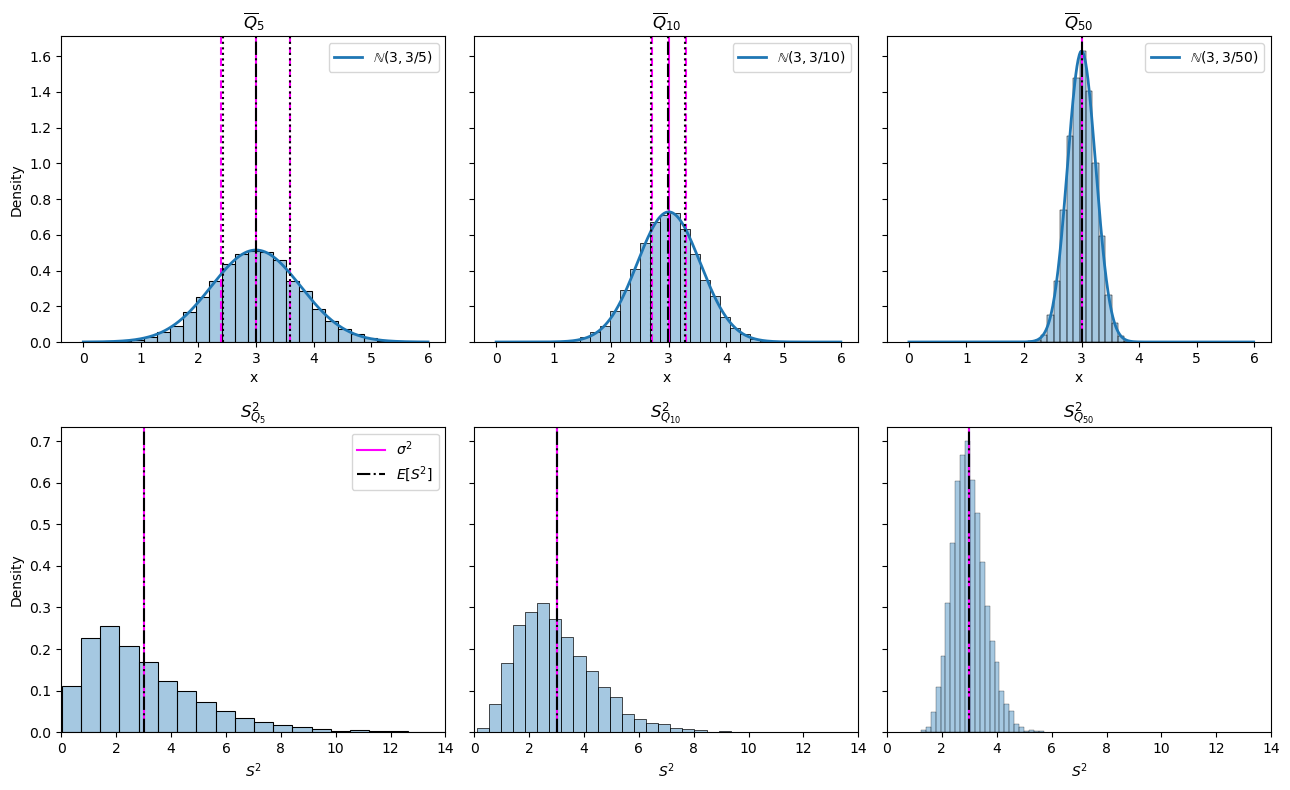

In [9]:
fig, axes = plot_rv_hists([mean_rv_dataq,var_rv_dataq], norm_q,thry_stats, 'data1q',[25,25,18,25,25,25])

axes[0,0].set_title(r'$\overline{Q}_{5}$')
axes[0,0].lines[3].set_label(r'$\mathbb{N}(3,3/5)$')
axes[0,0].legend()
axes[0,1].set_title(r'$\overline{Q}_{10}$')
axes[0,1].lines[3].set_label(r'$\mathbb{N}(3,3/10)$')
axes[0,1].legend()
axes[0,2].set_title(r'$\overline{Q}_{50}$')
axes[0,2].lines[0].set_label(r'$\mathbb{N}(3,3/50)$')
axes[0,2].legend()


axes[1,0].set_title(r'$S_{Q_{5}}^{2}$')
axes[1,0].lines[0].set_label(r'$\sigma^{2}$')
axes[1,0].lines[1].set_label(r'$E[S^{2}]$')
axes[1,0].legend()
axes[1,1].set_title(r'$S_{Q_{10}}^{2}$')
axes[1,2].set_title(r'$S_{Q_{50}}^{2}$')

for i in range(3):
    axes[1,i].set_xlim(0,14)

plt.tight_layout()
# plt.savefig('plots/Qn_mean_var_histograms.png',dpi = 400)
plt.show()

### (n-1/var)S2 ~ chi2

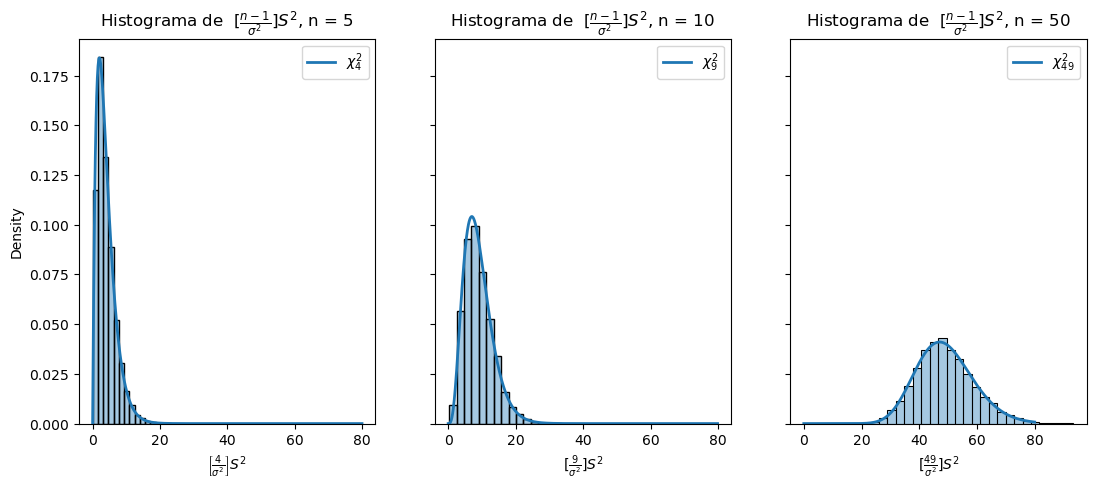

In [10]:
x_axis = np.arange(0,80,0.1)
n_list = [5,10,50]
mu = meanQ
var = varQ
chi2 = pd.DataFrame()
for col,n in zip(var_rv_dataq.columns,n_list):
    chi2[col] = ((n-1)/var)*var_rv_dataq[col]


fig, axes = plt.subplots(1,3, figsize = (13,5), sharey = True)
sns.histplot(chi2['n=5'], ax = axes[0], stat = 'density', bins=15, alpha = 0.4)
axes[0].plot(x_axis,stats.chi2.pdf(x_axis,5-1), linewidth = 2, label  = r'$\chi ^{2}_{4}$')
axes[0].set_xlabel(r'$\left[\frac{4}{\sigma ^{2}}\right]S^{2}$')
axes[0].set_title(r'Histograma de  $[\frac{n-1}{\sigma ^{2}}]S^{2}$, n = 5')

sns.histplot(chi2['n=10'], ax = axes[1], stat = 'density', bins=15, alpha = 0.4)
axes[1].plot(x_axis,stats.chi2.pdf(x_axis,10-1), linewidth = 2, label  = r'$\chi ^{2}_{9}$')
axes[1].set_xlabel(r'$[\frac{9}{\sigma ^{2}}]S^{2}$')
axes[1].set_title(r'Histograma de  $[\frac{n-1}{\sigma ^{2}}]S^{2}$, n = 10')

sns.histplot(chi2['n=50'], ax = axes[2], stat = 'density', bins=25, alpha = 0.4)
axes[2].plot(x_axis,stats.chi2.pdf(x_axis,50-1), linewidth = 2, label  = r'$\chi ^{2}_{49}$')
axes[2].set_xlabel(r'$[\frac{49}{\sigma ^{2}}]S^{2}$')
axes[2].set_title(r'Histograma de  $[\frac{n-1}{\sigma ^{2}}]S^{2}$, n = 50')


for ax in axes:    
    ax.legend()
# plt.tight_layout()
# plt.savefig('plots/chi2_hist.png', dpi = 400)
plt.show()

### Tbar ~ N(u,var/n)

In [19]:
# Get random variables points for data1t, 

x_axis = np.arange(1,5,0.01)  # To construc norm pdf
n = [5,10,50]
m = 10000

mean_rv_datat, var_rv_datat = construct_n_rand_var(datasets['data1t'], n, m)

norm_t = get_norm_by_n(n, meanT, varT,x_axis)

#Note: This processes will take a while

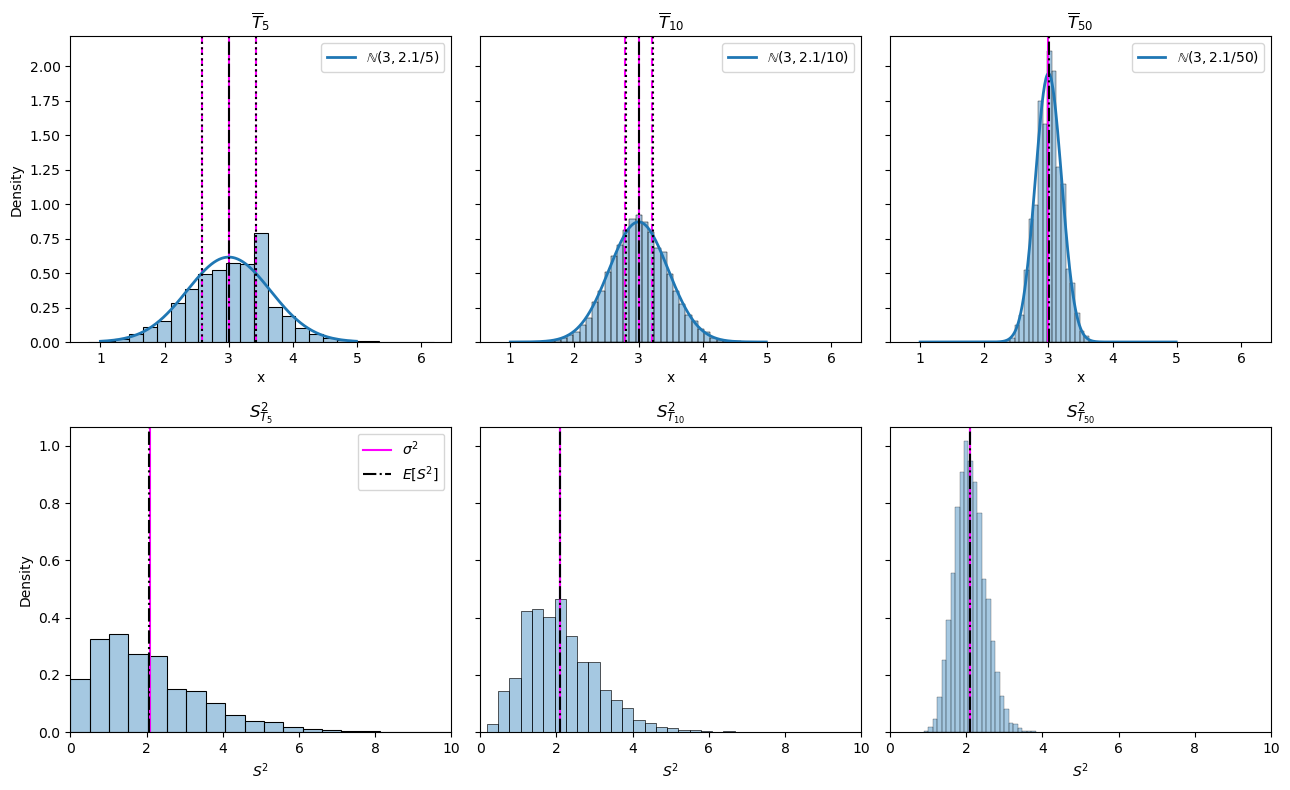

In [20]:
fig, axes = plot_rv_hists([mean_rv_datat,var_rv_datat], 
                          norm_t,thry_stats, 'data1t',[25,33,20,25,25,25])

axes[0,0].set_title(r'$\overline{T}_{5}$')
axes[0,0].lines[3].set_label(r'$\mathbb{N}(3,2.1/5)$')
axes[0,0].legend()
axes[0,1].set_title(r'$\overline{T}_{10}$')
axes[0,1].lines[3].set_label(r'$\mathbb{N}(3,2.1/10)$')
axes[0,1].legend()
axes[0,2].set_title(r'$\overline{T}_{50}$')
axes[0,2].lines[0].set_label(r'$\mathbb{N}(3,2.1/50)$')
axes[0,2].legend()


axes[1,0].set_title(r'$S_{T_{5}}^{2}$')
axes[1,0].lines[0].set_label(r'$\sigma^{2}$')
axes[1,0].lines[1].set_label(r'$E[S^{2}]$')
axes[1,0].legend()
axes[1,1].set_title(r'$S_{T_{10}}^{2}$')
axes[1,2].set_title(r'$S_{T_{50}}^{2}$')


for i in range(3):
    axes[1,i].set_xlim(0,10)
plt.tight_layout()
# plt.savefig('plots/Tn_mean_var_histograms.png',dpi = 400)
plt.show()

# $\overline{X}_{n} \backsim \mathbb{N} (\mu, \sigma^{2} = \mu / n)$

In [13]:

x_axis = np.arange(0,6,0.01)  # To construc norm pdf
n = [5,10,50]
m = 10000

mean_rv_datax, var_rv_datax = construct_n_rand_var(datasets['data1x'], n, m)

norm_x = get_norm_by_n(n, meanX, varX,x_axis)

#Note: This processes will take a while

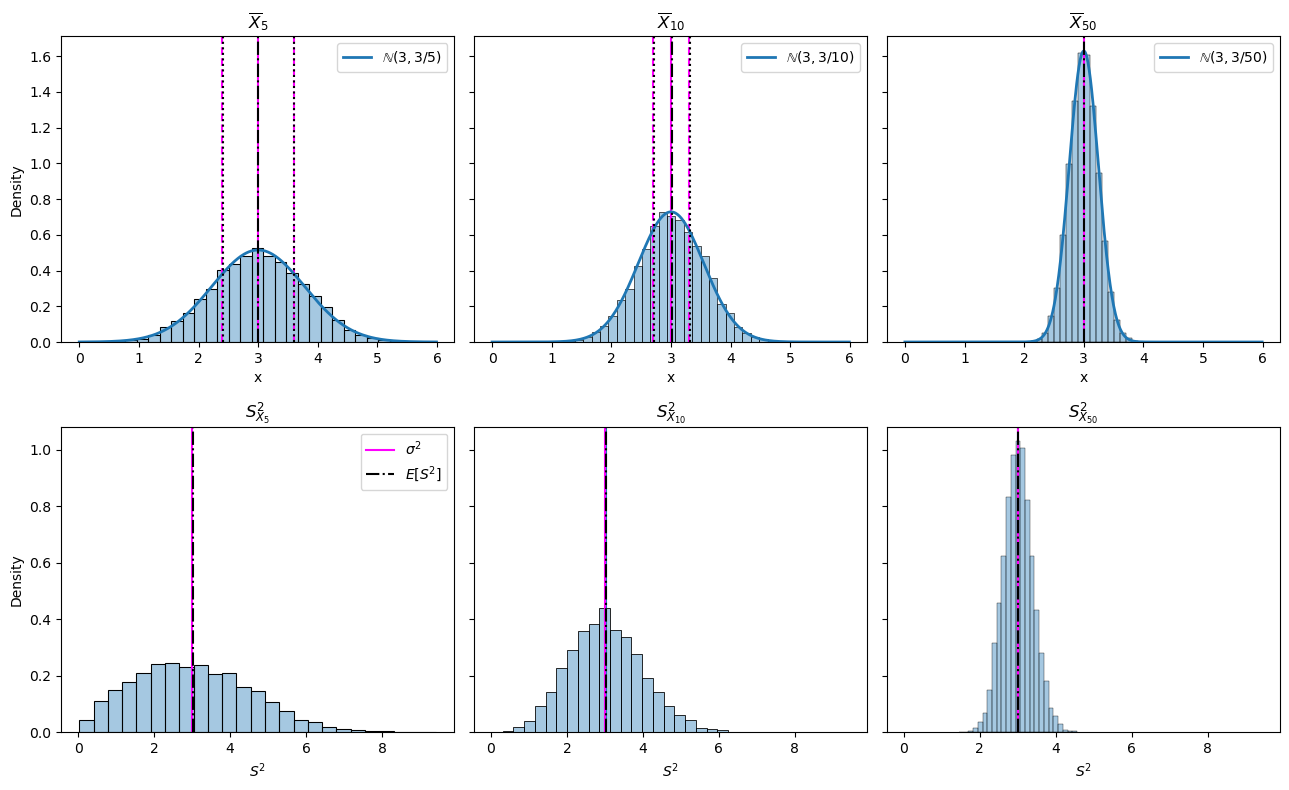

In [14]:
fig, axes = plot_rv_hists([mean_rv_datax,var_rv_datax], norm_x,thry_stats, 'data1x',[25,25,18,25,25,25])

axes[0,0].set_title(r'$\overline{X}_{5}$')
axes[0,0].lines[3].set_label(r'$\mathbb{N}(3,3/5)$')
axes[0,0].legend()
axes[0,1].set_title(r'$\overline{X}_{10}$')
axes[0,1].lines[3].set_label(r'$\mathbb{N}(3,3/10)$')
axes[0,1].legend()
axes[0,2].set_title(r'$\overline{X}_{50}$')
axes[0,2].lines[0].set_label(r'$\mathbb{N}(3,3/50)$')
axes[0,2].legend()


axes[1,0].set_title(r'$S_{X_{5}}^{2}$')
axes[1,0].lines[0].set_label(r'$\sigma^{2}$')
axes[1,0].lines[1].set_label(r'$E[S^{2}]$')
axes[1,0].legend()
axes[1,1].set_title(r'$S_{X_{10}}^{2}$')
axes[1,2].set_title(r'$S_{X_{50}}^{2}$')



plt.tight_layout()
# plt.savefig('plots/Xn_mean_var_histograms.png',dpi = 400)
plt.show()

### $\overline{Y}_{n} \backsim \mathbb{N}  (\mu, \sigma^{2} = \mu / n)$

In [15]:
x_axis = np.arange(0,10,0.01)  # To construc norm pdf
n = [5,10,50]
m = 10000

mean_rv_datay, var_rv_datay = construct_n_rand_var(datasets['data1y'], n, m)

norm_y = get_norm_by_n(n, meanY, varY,x_axis)

#Note: This processes will take a while

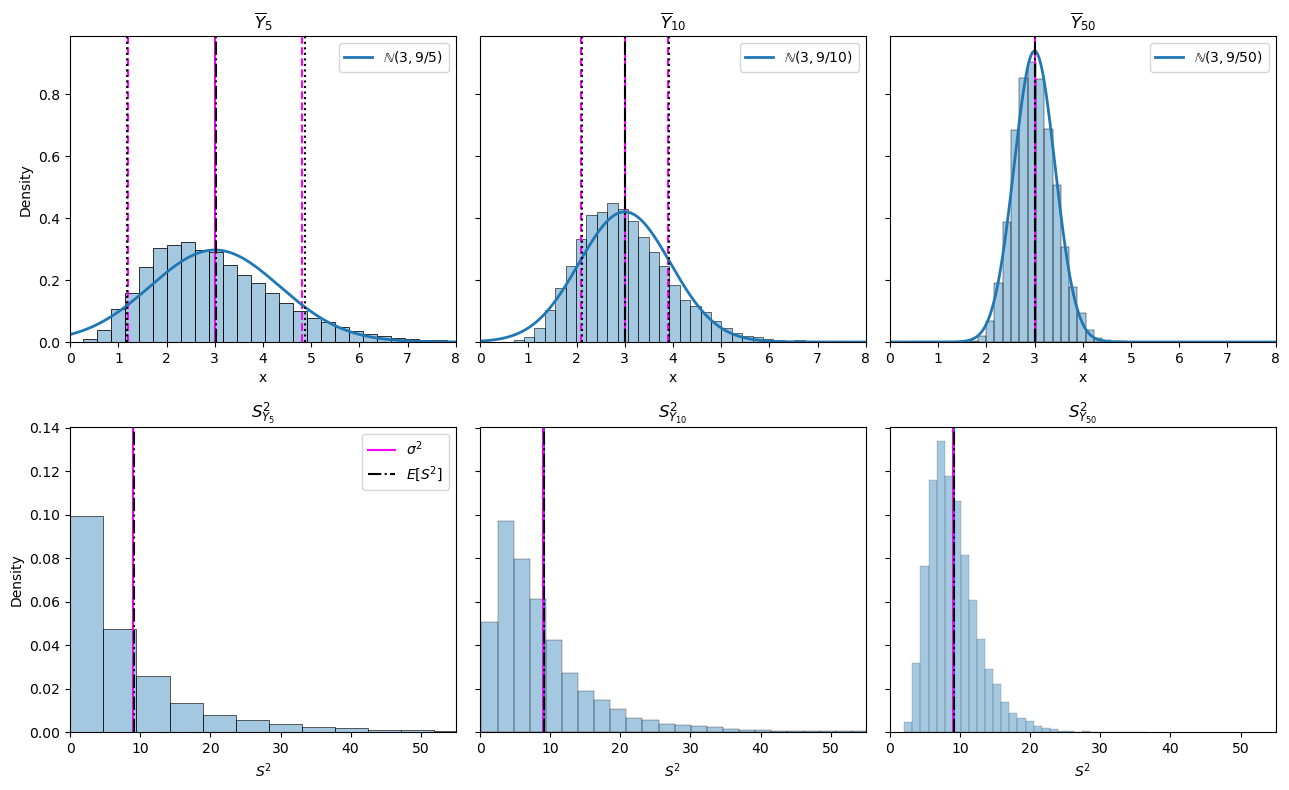

In [16]:
fig, axes = plot_rv_hists([mean_rv_datay,var_rv_datay], norm_y,thry_stats, 'data1y',[35,35,20,45,40,30])


axes[0,0].set_title(r'$\overline{Y}_{5}$')
axes[0,0].lines[3].set_label(r'$\mathbb{N}(3,9/5)$')
axes[0,0].legend()
axes[0,1].set_title(r'$\overline{Y}_{10}$')
axes[0,1].lines[3].set_label(r'$\mathbb{N}(3,9/10)$')
axes[0,1].legend()
axes[0,2].set_title(r'$\overline{Y}_{50}$')
axes[0,2].lines[0].set_label(r'$\mathbb{N}(3,9/50)$')
axes[0,2].legend()

for i in range(3):
    axes[0,i].set_xlim(0,8)
    
axes[1,0].set_title(r'$S_{Y_{5}}^{2}$')
axes[1,0].lines[0].set_label(r'$\sigma^{2}$')
axes[1,0].lines[1].set_label(r'$E[S^{2}]$')
axes[1,0].legend()
axes[1,1].set_title(r'$S_{Y_{10}}^{2}$')
axes[1,2].set_title(r'$S_{Y_{50}}^{2}$')

for ax in range(3):
    axes[1,i].set_xlim(0,55)


plt.tight_layout()
# plt.savefig('plots/Yn_mean_var_histograms.png',dpi = 400)
plt.show()